In [9]:
import glob
from pprint import pprint
from functools import lru_cache

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df = (
    pd
    .concat([pd.read_csv(fn, sep="\t", names=["gm1", "gm2"]) for fn in glob.iglob("Data/ZD aq*.txt")])
    .sort_index()
    .rename_axis("tag")
    .reset_index()
)
df["gm1"] = df["gm1"].where(df["gm1"] > 0, np.nan)
df["gm2"] = df["gm2"].where(df["gm2"] > 0, np.nan)
df.head()

,tag,gm1,gm2
0,156522992,0.082293,0.015918
1,156522993,0.099502,0.018138
2,156522994,0.088236,0.016488
3,156522995,0.052606,0.010532
4,156522996,0.073991,0.013921


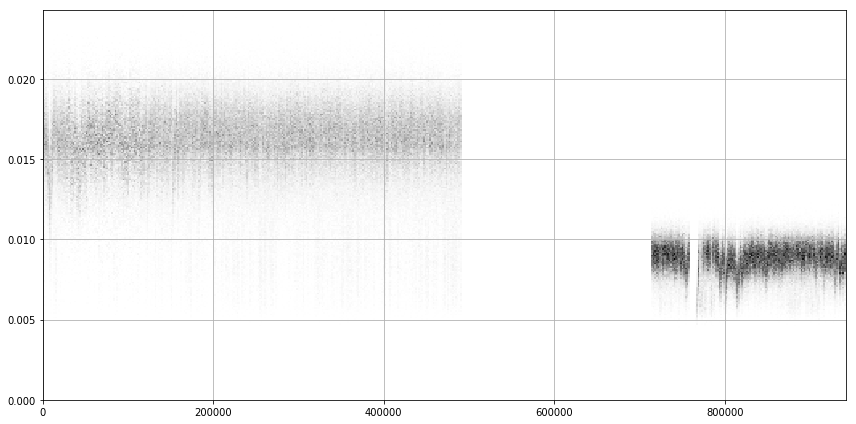

In [18]:
where = ~df.isna().any(1)

plt.figure(figsize=(12, 6))
plt.hist2d(df.index[where], df.loc[where, "gm2"], bins=(500, 200), cmap="Greys")
plt.ylim(0, None)
plt.grid(True)
plt.tight_layout()
plt.show()

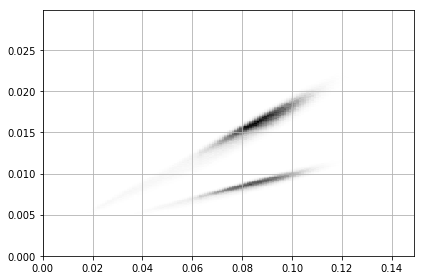

In [24]:
plt.figure()
plt.hist2d(
    df.loc[where, "gm1"], df.loc[where, "gm2"],
    bins=(np.arange(0, 0.15, 0.001),
          np.arange(0, 0.03, 0.0001)),
    cmap="Greys")
plt.xlim(0, None)
plt.ylim(0, None)
plt.grid(True)
plt.tight_layout()
plt.show()